# Kaggle competition - Titanic Problem

**Files downloaded on 09-Feb-2020**

## About Titanic
**1502 out of 2224 people died; i.e. 722 survived**

## About the Problem
**Use train.csv for training (12 columns including actual outcome) - has 891 records**
**Use test.csv for predictions(11 variables) - 418 records**
**Use gender_submission.csv for format for submission**

## Data Dictionary

1. survival ==> 0=No; 1=Yes
2. pclass ==> Ticket Class (also represents the SES) ==> 1 = 1st (upper class), 2 = 2nd (middle class), 3 = 3rd (lower class)
3. sex ==> SEX
4. Age ==> Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5
5. sibsp ==> # of siblings / spouses aboard the Titanic
    5.1 Sibling = brother, sister, stepbrother, stepsister
    5.2 Spouse = husband, wife (mistresses and fiancés were ignored)
6. parch ==> # of parents / children aboard the Titanic
    6.1 Parent = mother, father
    6.2 Child = daughter, son, stepdaughter, stepson
    6.3 Some children travelled only with a nanny, therefore parch=0 for them.
7. ticket ==> Ticket number
8. fare ==> Passenger fare
9. cabin ==> Cabin number
10. embarked ==> Port of Embarkation ==> C = Cherbourg, Q = Queenstown, S = Southampton

# Markdown Codics

# title
## major headings
### subheadings
#### 4th level subheadings

__Bold__: 2 underscores before and after or two (stars / asterisk) before and after
_Italics_: 1 underscore before and after or 1 (star / asterisk) before and after

__Line breaks:__ Sometimes markdown doesn’t make line breaks when you want them. Use 2 spaces or this code for a manual line break: <br>

__Colors:__ Use this code: <font color=blue|red|green|pink|yellow>Text</font> Not all markdown code works within a font tag, so review your colored text carefully!

__Indented quoting:__ Use a greater than sign (>) and then a space, then type the text. The text is indented and has a gray horizontal line to the left of it until the next carriage return.

__Bullets:__ 
> Use the *dash sign (- ) with a space* after it, or *a space, a dash, and a space ( - ), to create a circular bullet*. 
> To create a sub bullet, use a tab followed a dash and a space. 
> You can also use an asterisk instead of a dash, and it works the same.

__Numbered lists:__ 
> Start with 1. followed by a space, then it starts numbering for you. 
> Start each line with some number and a period, then a space. Tab to indent to get subnumbering.

__Graphics:__ You can attach image files directly to a notebook only in Markdown cells. Drag and drop your images to the Mardown cell to attach it to the notebook. To add images to other cell types, you can use only graphics that are hosted on the web. You can’t add captions for graphics at this time. Use this code: <img src="url.gif" alt="Alt text that describes the graphic" title="Title text" />

__Geometric shapes:__ Use this code with a decimal or hex reference number from here: UTF-8 Geometric shapes
&#reference_number;

__Horizontal lines:__ Use three asterisks: ***

**Internal links:** To link to a section, use this code: [section title](#section-title) For the text in the parentheses, replace spaces and special characters with a hyphen. Make sure to test all the links!
Alternatively, you can add an ID for a section right above the section title. Use this code: <a id="section_ID"></a> Make sure that the section_ID is unique within the notebook.
Use this code for the link and make sure to test all the links! [section title](#section_ID)
External links: Use this code and test all links! [link text](http://url)

__Mathematical symbols:__ Use this code: $ mathematical symbols $

__Monospace font:__ Surround text with a back single quotation mark. (`) 
`Use monospace for file path and file names and for text users enter or message text users see.


## Solutioning
*refer https://triangleinequality.wordpress.com/2013/09/08/basic-feature-engineering-with-the-titanic-data/*

### Steps needed:
1. define the problem statement
2. collect data
3. exploratory data analysis
4. feature engineering
5. feature selection
6. modeling
7. testing


In [1]:
import pandas as pd

train = pd.read_csv('../data/train.csv')
test = pd.read_csv('../data/test.csv')
gender_submission_output = pd.read_csv('../data/gender_submission.csv')


In [2]:
train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
train.shape

(891, 12)

Training set has 891 rows and 12 columns (including the second column as the result column (Survived)

In [5]:
test.shape

(418, 11)

Test set has 418 rows and 11 columns

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


Age has some missing values; Cabin has many missing values; Embarked has 2 missing values

In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


*Age* has some missing values; *Cabin* has lot of missing values; *Fare* has 1 missing value

In [8]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Training Set: 
*Age* has 177 missing values; *Cabin* has 687 missing values and *Embarked* has 2 missing values

In [9]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

Test Set: *Age* has 86 missing values; *Cabin* has 327 missing values; *Fare* has 1 missing value

Refer *https://www.youtube.com/watch?v=3eTSVGY_fIE&t=248s*

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set() #setting seaborn default for plots

## Bar Chart for Categorical Features
1. Pclass
2. Sex
3. SibSp
4. Parch
5. Embarked
6. Cabin

In [11]:
def bar_chart(feature):
    survived = train[train['Survived']==1][feature].value_counts()
    dead = train[train['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar', stacked = True, figsize=(10,5))

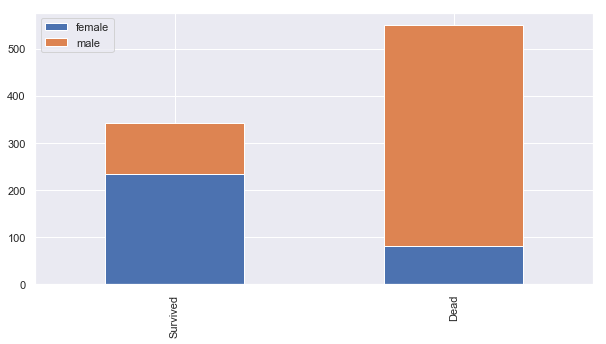

In [12]:
bar_chart('Sex')

The chart helps determine that Women survived more likely than Males

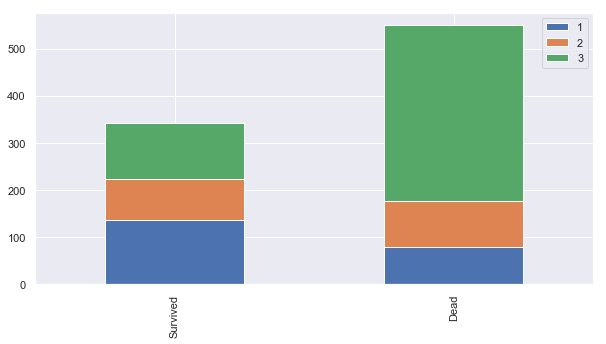

In [13]:
bar_chart('Pclass')

There are many more class 3 people amongst the dead. Also, amongst the survived, there are more class 1 people.

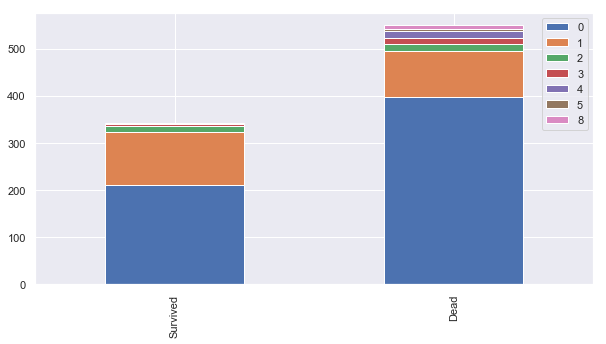

In [14]:
bar_chart('SibSp')

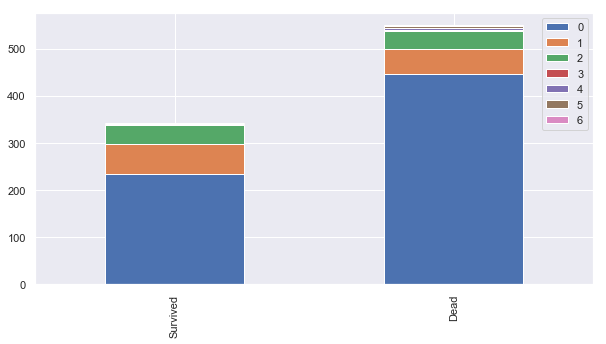

In [15]:
bar_chart('Parch')

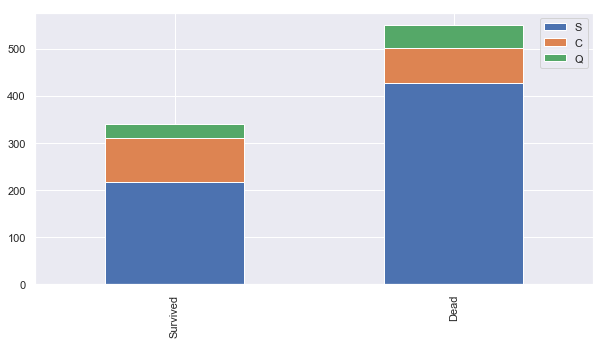

In [16]:
bar_chart('Embarked')

# Features Engineering

This helps in creating features which will help in creating new features based on some analysis of the data set


<img src="https://static1.squarespace.com/static/5006453fe4b09ef2252ba068/t/5090b249e4b047ba54dfd258/1351660113175/TItanic-Survival-Infographic.jpg?format=1500w" alt="Alt text that describes the graphic" title="Title text" />

The image helps to learn that the red portions (mainly the class 3) people had a high probability of not surviving (especially the class 3 in the front). This also gives idea on the cabin numbers.
People in the class1 were high above and hence had a very low probability to sink.

#### First step is to segregate the titles from people's names and discard the names from our engineering


In [17]:
train_test_data = [train,test]
for dataset in train_test_data:
    dataset['Title'] = dataset['Name'].str.extract('([A-Za-z]+)\.',expand=False)

In [18]:
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Col           2
Major         2
Lady          1
Ms            1
Jonkheer      1
Don           1
Capt          1
Sir           1
Mme           1
Countess      1
Name: Title, dtype: int64

In [19]:
train.shape

(891, 13)

In [20]:
# The mapping for other titles than Mr, Miss, Mrs, Master is done after investigating the data in combination with the 
# sex of the passenger
title_mapping = {"Mr": 0, "Miss": 1, "Mrs": 2, "Master": 3, "Sir": 0, "Rev": 0, "Jonkheer": 0, "Don": 0, "Capt": 0,
                 "Dr": 4, "Mlle": 1, "Countess": 1, "Ms": 1, "Lady": 2, "Mme": 1, "Dona": 1}

for dataset in train_test_data:
    dataset['Title'] = dataset['Title'].map(title_mapping)

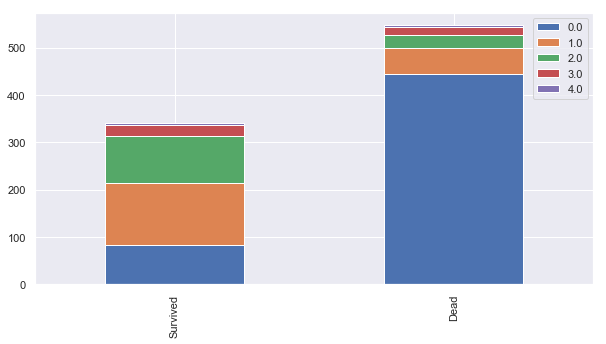

In [21]:
bar_chart('Title')

#### Updating the mapping of Dr to either MR. or Miss.

In [22]:
train[(train['Title']==4) & (train['Sex'] == "male")].head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
245,246,0,1,"Minahan, Dr. William Edward",male,44.0,2,0,19928,90.00,C78,Q,4.0
317,318,0,2,"Moraweck, Dr. Ernest",male,54.0,0,0,29011,14.00,NaN,S,4.0
398,399,0,2,"Pain, Dr. Alfred",male,23.0,0,0,244278,10.50,NaN,S,4.0
632,633,1,1,"Stahelin-Maeglin, Dr. Max",male,32.0,0,0,13214,30.50,B50,C,4.0
660,661,1,1,"Frauenthal, Dr. Henry William",male,50.0,2,0,PC 17611,133.65,NaN,S,4.0
766,767,0,1,"Brewe, Dr. Arthur Jackson",male,NaN,0,0,112379,39.60,NaN,C,4.0


In [23]:
train.loc[(train['Title']==4) & (train['Sex'] == "male"),'Title']=0
train.loc[(train['Title']==4) & (train['Sex'] == "female"),'Title']=1

In [24]:
train[train['Title']==4].head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title


In [25]:
test.loc[(test['Title']==4) & (test['Sex'] == "male"),'Title']=0
test.loc[(test['Title']==4) & (test['Sex'] == "female"),'Title']=1


In [26]:
test[test['Title']==4].head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title


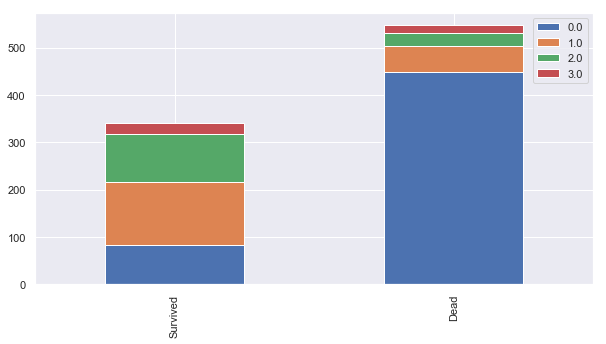

In [27]:
bar_chart('Title')

In [28]:
#The column Name can be dropped out
#train.drop('Name', axis=1, inplace=True)
#test.drop('Name',axis=1,inplace=True)

#### Mapping Sex Values

In [29]:
sex_mapping = {"male": 0, "female": 1}
for dataset in train_test_data:
    dataset['Sex'] = dataset['Sex'].map(sex_mapping)

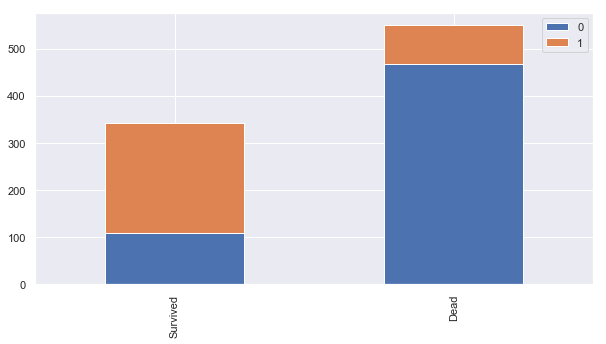

In [30]:
bar_chart('Sex')

In [31]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Title            4
dtype: int64

In [32]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Title            2
dtype: int64

In [33]:
#fill missing values in Age with median of ages under various Title groups
train["Age"].fillna(train.groupby("Title")["Age"].transform("median"),inplace=True)
test["Age"].fillna(test.groupby("Title")["Age"].transform("median"),inplace=True)


In [34]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Title            4
dtype: int64

In [35]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Title            2
dtype: int64

C:\Users\sacgarg\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


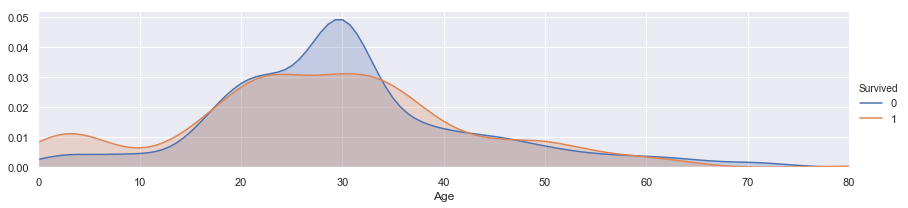

In [36]:
facet = sns.FacetGrid(train,hue="Survived", aspect=4)
facet.map(sns.kdeplot,'Age',shade=True)
facet.set(xlim=(0,train['Age'].max()))
facet.add_legend()

plt.show()

In [37]:
#Categorising the age values

for dataset in train_test_data:
    dataset.loc[dataset['Age'] <= 16, 'Age'] = 0,
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <=26), 'Age'] = 1,
    dataset.loc[(dataset['Age'] > 26) & (dataset['Age'] <=36), 'Age'] = 2,
    dataset.loc[(dataset['Age'] > 36) & (dataset['Age'] <=60), 'Age'] = 3,
    dataset.loc[dataset['Age'] > 60, 'Age'] = 4

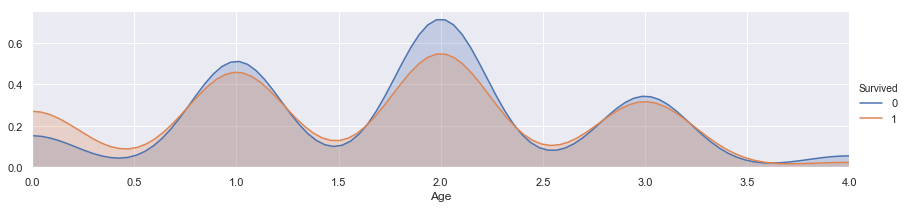

In [38]:
facet = sns.FacetGrid(train,hue="Survived", aspect=4)
facet.map(sns.kdeplot,'Age',shade=True)
facet.set(xlim=(0,train['Age'].max()))
facet.add_legend()

plt.show()

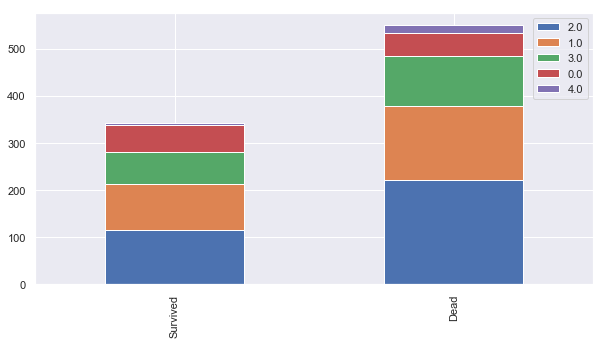

In [39]:
bar_chart('Age')

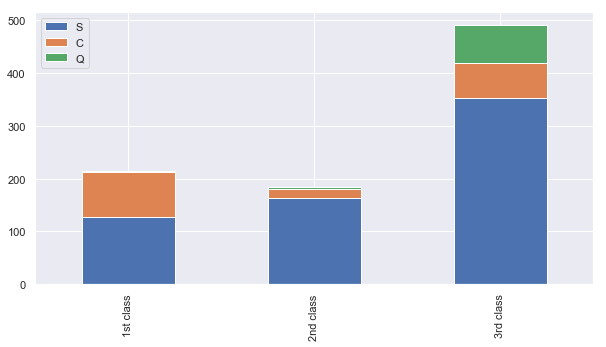

In [40]:
# Checking class wise embarkments from the 3 places
Pclass1 = train[train['Pclass']==1]['Embarked'].value_counts()
Pclass2 = train[train['Pclass']==2]['Embarked'].value_counts()
Pclass3 = train[train['Pclass']==3]['Embarked'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class', '2nd class', '3rd class']
df.plot(kind='bar', stacked=True, figsize=(10,5))

In [41]:
train[train['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
61,62,1,1,"Icard, Miss. Amelie",1,3.0,0,0,113572,80.0,B28,NaN,1.0
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",1,4.0,0,0,113572,80.0,B28,NaN,2.0


In [42]:
# filling the NaN with S as most of the passengers embarked from S
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')

In [43]:
train[train['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title


In [44]:
#Categorising the Embarkment valuees
embarked_mapping = {"S":0, "C":1, "Q":2}
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].map(embarked_mapping)

In [45]:
train[train['Fare'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title


In [46]:
test[test['Fare'].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
152,1044,3,"Storey, Mr. Thomas",0,4.0,0,0,3701,NaN,NaN,0,0.0


In [47]:
#Filling the NaN values in Fare based on median of grouping by Pclass, Embarkment, Age and Sex
groupby_dictionary = {'Pclass':'G1', 'Embarked':'G2','Age':'G3','Sex':'G4'}
#train['Fare'].fillna(train.groupby(groupby_dictionary, axis=1)["Fare"].transform("median"),inplace=True)
train['Fare'].fillna(train.groupby("Pclass")["Fare"].transform("median"),inplace=True)
test['Fare'].fillna(test.groupby("Pclass")["Fare"].transform("median"),inplace=True)

In [48]:
test[test['Fare'].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title


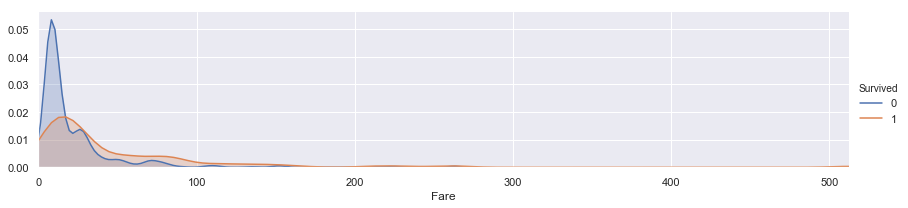

In [49]:
facet = sns.FacetGrid(train,hue="Survived", aspect=4)
facet.map(sns.kdeplot,'Fare',shade=True)
facet.set(xlim=(0,train['Fare'].max()))
facet.add_legend()

plt.show()

(100, 500)

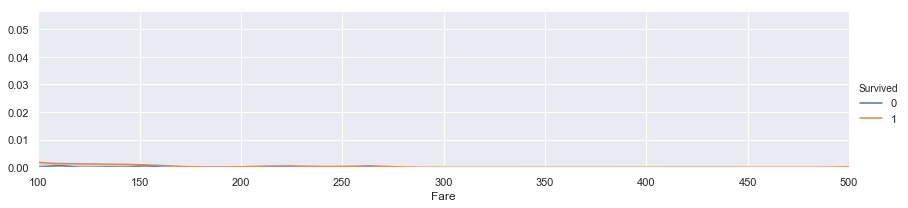

In [50]:
facet = sns.FacetGrid(train,hue="Survived", aspect=4)
facet.map(sns.kdeplot,'Fare',shade=True)
facet.set(xlim=(0,train['Fare'].max()))
facet.add_legend()

plt.xlim(100,500)

In [51]:
# It seems that the pattern breaks at 17, 100, and onwards
for dataset in train_test_data:
    dataset.loc[dataset['Fare']<=17, 'Fare'] = 0,
    dataset.loc[(dataset['Fare']>17) & (dataset['Fare']<=100), 'Fare'] = 1,
    dataset.loc[dataset['Fare']>17, 'Fare'] = 2,
    

In [52]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,1.0,1,0,A/5 21171,0.0,NaN,0,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,3.0,1,0,PC 17599,1.0,C85,1,2.0
2,3,1,3,"Heikkinen, Miss. Laina",1,1.0,0,0,STON/O2. 3101282,0.0,NaN,0,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2.0,1,0,113803,1.0,C123,0,2.0
4,5,0,3,"Allen, Mr. William Henry",0,2.0,0,0,373450,0.0,NaN,0,0.0


In [53]:
train.Cabin.value_Counts()

AttributeError: 'Series' object has no attribute 'value_Counts'

In [54]:
for dataset in train_test_data:
    dataset['CabinLetter'] = dataset['Cabin'].str[:1]
    dataset['CabinNbr'] = dataset['Cabin'].str[1:]

In [55]:
train.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,CabinLetter,CabinNbr
0,1,0,3,"Braund, Mr. Owen Harris",0,1.0,1,0,A/5 21171,0.0,NaN,0,0.0,NaN,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,3.0,1,0,PC 17599,1.0,C85,1,2.0,C,85
2,3,1,3,"Heikkinen, Miss. Laina",1,1.0,0,0,STON/O2. 3101282,0.0,NaN,0,1.0,NaN,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2.0,1,0,113803,1.0,C123,0,2.0,C,123
4,5,0,3,"Allen, Mr. William Henry",0,2.0,0,0,373450,0.0,NaN,0,0.0,NaN,NaN
5,6,0,3,"Moran, Mr. James",0,2.0,0,0,330877,0.0,NaN,2,0.0,NaN,NaN
6,7,0,1,"McCarthy, Mr. Timothy J",0,3.0,0,0,17463,1.0,E46,0,0.0,E,46
7,8,0,3,"Palsson, Master. Gosta Leonard",0,0.0,3,1,349909,1.0,NaN,0,3.0,NaN,NaN
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,2.0,0,2,347742,0.0,NaN,0,2.0,NaN,NaN
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,0.0,1,0,237736,1.0,NaN,1,2.0,NaN,NaN


In [56]:
train[train.CabinNbr.str.len() > 3]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,CabinLetter,CabinNbr
27,28,0,1,"Fortune, Mr. Charles Alexander",0,1.0,3,2,19950,2.0,C23 C25 C27,0,0.0,C,23 C25 C27
75,76,0,3,"Moen, Mr. Sigurd Hansen",0,1.0,0,0,348123,0.0,F G73,0,0.0,F,G73
88,89,1,1,"Fortune, Miss. Mabel Helen",1,1.0,3,2,19950,2.0,C23 C25 C27,0,1.0,C,23 C25 C27
97,98,1,1,"Greenfield, Mr. William Bertram",0,1.0,0,1,PC 17759,1.0,D10 D12,1,0.0,D,10 D12
118,119,0,1,"Baxter, Mr. Quigg Edmond",0,1.0,0,1,PC 17558,2.0,B58 B60,1,0.0,B,58 B60
128,129,1,3,"Peter, Miss. Anna",1,1.0,1,1,2668,1.0,F E69,1,1.0,F,E69
297,298,0,1,"Allison, Miss. Helen Loraine",1,0.0,1,2,113781,2.0,C22 C26,0,1.0,C,22 C26
299,300,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",1,3.0,0,1,PC 17558,2.0,B58 B60,1,2.0,B,58 B60
305,306,1,1,"Allison, Master. Hudson Trevor",0,0.0,1,2,113781,2.0,C22 C26,0,3.0,C,22 C26
311,312,1,1,"Ryerson, Miss. Emily Borie",1,1.0,2,2,PC 17608,2.0,B57 B59 B63 B66,1,1.0,B,57 B59 B63 B66


In [67]:
test[test.Cabin.str.contains("F ", na=False)]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,CabinLetter,CabinNbr


In [65]:
#treating values which have "F " e.g. F G63
for dataset in train_test_data:
    dataset.loc[dataset.Cabin.str.contains("F ", na=False), 'Cabin'] = dataset['Cabin'].str[2:]

In [68]:
test[test.Cabin.str.contains("F ", na=False)]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,CabinLetter,CabinNbr


In [70]:
train[train.Cabin.str.contains(" ", na=False)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,CabinLetter,CabinNbr
27,28,0,1,"Fortune, Mr. Charles Alexander",0,1.0,3,2,19950,2.0,C23 C25 C27,0,0.0,C,NaN
88,89,1,1,"Fortune, Miss. Mabel Helen",1,1.0,3,2,19950,2.0,C23 C25 C27,0,1.0,C,NaN
97,98,1,1,"Greenfield, Mr. William Bertram",0,1.0,0,1,PC 17759,1.0,D10 D12,1,0.0,D,NaN
118,119,0,1,"Baxter, Mr. Quigg Edmond",0,1.0,0,1,PC 17558,2.0,B58 B60,1,0.0,B,NaN
297,298,0,1,"Allison, Miss. Helen Loraine",1,0.0,1,2,113781,2.0,C22 C26,0,1.0,C,NaN
299,300,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",1,3.0,0,1,PC 17558,2.0,B58 B60,1,2.0,B,NaN
305,306,1,1,"Allison, Master. Hudson Trevor",0,0.0,1,2,113781,2.0,C22 C26,0,3.0,C,NaN
311,312,1,1,"Ryerson, Miss. Emily Borie",1,1.0,2,2,PC 17608,2.0,B57 B59 B63 B66,1,1.0,B,NaN
341,342,1,1,"Fortune, Miss. Alice Elizabeth",1,1.0,3,2,19950,2.0,C23 C25 C27,0,1.0,C,NaN
390,391,1,1,"Carter, Mr. William Ernest",0,2.0,1,2,113760,2.0,B96 B98,0,0.0,B,NaN


In [76]:
# treating values which have more than one cabin numbers e.g. B96 B98
for dataset in train_test_data:
    dataset.loc[dataset.Cabin.str.contains(" ", na=False), 'Cabin'] = dataset['Cabin'].str.split(' ')[0]

#df['a'] = df['a'].apply(lambda x: x.split('-')[0])

In [78]:
train[train.Cabin.str.contains(" ", na=False)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,CabinLetter,CabinNbr


In [79]:
for dataset in train_test_data:
    dataset['CabinLetter'] = dataset['Cabin'].str[:1]
    dataset['CabinNbr'] = dataset['Cabin'].str[1:]

In [82]:
train.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,CabinLetter,CabinNbr
0,1,0,3,"Braund, Mr. Owen Harris",0,1.0,1,0,A/5 21171,0.0,NaN,0,0.0,NaN,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,3.0,1,0,PC 17599,1.0,C85,1,2.0,C,85
2,3,1,3,"Heikkinen, Miss. Laina",1,1.0,0,0,STON/O2. 3101282,0.0,NaN,0,1.0,NaN,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2.0,1,0,113803,1.0,C123,0,2.0,C,123
4,5,0,3,"Allen, Mr. William Henry",0,2.0,0,0,373450,0.0,NaN,0,0.0,NaN,NaN
5,6,0,3,"Moran, Mr. James",0,2.0,0,0,330877,0.0,NaN,2,0.0,NaN,NaN
6,7,0,1,"McCarthy, Mr. Timothy J",0,3.0,0,0,17463,1.0,E46,0,0.0,E,46
7,8,0,3,"Palsson, Master. Gosta Leonard",0,0.0,3,1,349909,1.0,NaN,0,3.0,NaN,NaN
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,2.0,0,2,347742,0.0,NaN,0,2.0,NaN,NaN
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,0.0,1,0,237736,1.0,NaN,1,2.0,NaN,NaN


ValueError: could not convert string to float: 

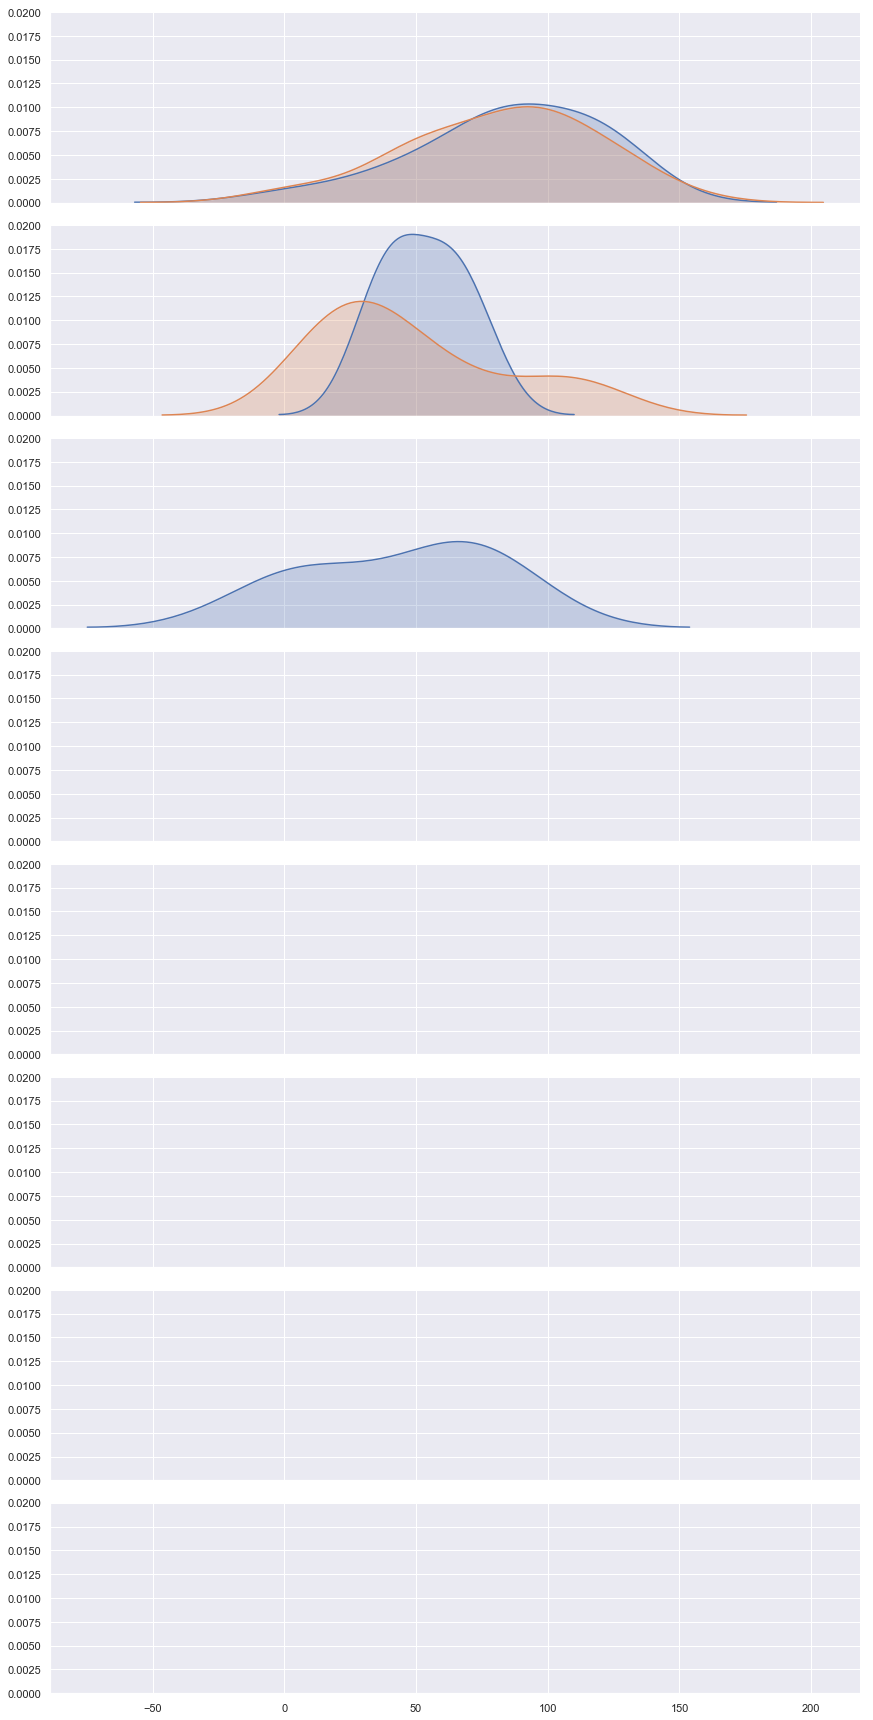

In [84]:
facet = sns.FacetGrid(train,row = "CabinLetter", hue="Survived", aspect=4)
facet.map(sns.kdeplot,'CabinNbr',shade=True)
facet.set(xlim=(0,train['CabinNbr'].max()))
facet.add_legend()

plt.show()